# Main Project

## Objective

To develop an accurate model that can be used to predict sales on the basis of the three media budgets

## Import Dependencies

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Processing

In [273]:
df = pd.read_csv('Advertising.csv')

In [274]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Dataset Description

#### Original Dataset Description (Provided by Client):

- TV: Advertising spend in thousands (K) of Canadian Dollars ($)

- Radio: Advertising spend in thousands (K) of Canadian Dollars ($)

- Newspaper: Advertising spend in thousands (K) of Canadian Dollars ($)

- Sales: Sales in thousands (K) of Canadian Dollars ($)

Upon initial inspection, the units appeared inconsistent, as the advertising costs exceeded the reported sales figures. After confirming with the client, the unit for Sales has been revised for accuracy.

#### Updated Dataset Description (Confirmed by Client):

- TV: Advertising spend in thousands (K) of Canadian Dollars ($)

- Radio: Advertising spend in thousands (K) of Canadian Dollars ($)

- Newspaper: Advertising spend in thousands (K) of Canadian Dollars ($)

- Sales: Sales volume in thousands (K) of units



### Dataset Visualization 

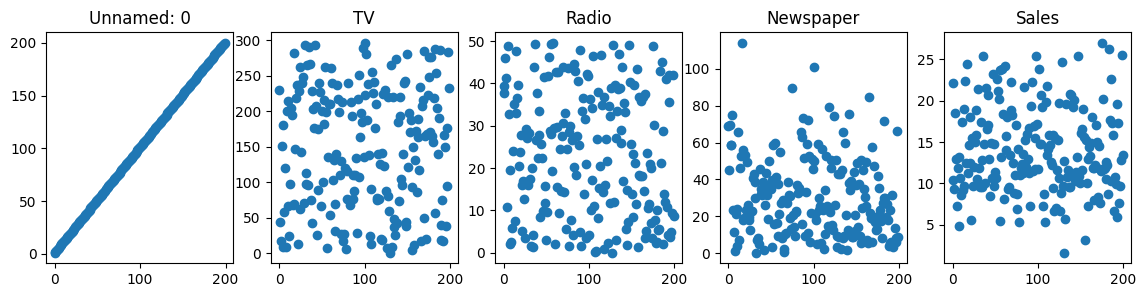

In [275]:
plt.figure(figsize=(14,3))
for i, col in enumerate(df):
    plt.subplot(1,5,i+1)
    plt.title(col)
    plt.scatter(np.arange(200),df[col])

Upon reviewing the dataset and visualizing the "Unnamed: 0" column, we observed that it serves only as a row index. This was further confirmed through communication with the client.

As this column does not carry any meaningful information or predictive value, it will not contribute to improving the accuracy of our model. Therefore, we have decided to drop it from the dataset during preprocessing.

In [276]:
df = df.drop(['Unnamed: 0'],axis=1) 

In [277]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Mean Median Mode

In [278]:
for val in df:
    m = df[val].mean()
    print(m)

147.0425
23.264000000000006
30.553999999999995
14.0225


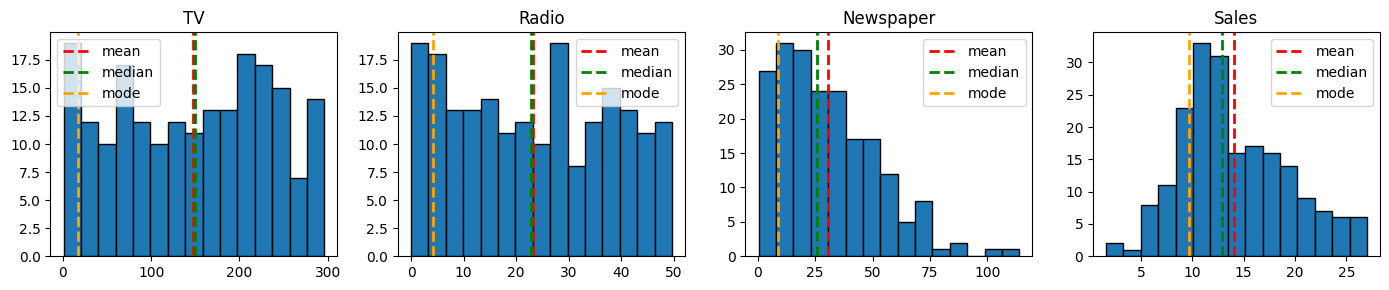

In [279]:
plt.figure(figsize=(14, 3))
for i, col in enumerate(df.columns):
    plt.subplot(1, 4, i+1) 
    plt.title(col)
    plt.hist(df[col], bins=15,edgecolor='black')

    meanh = df[col].mean()
    medh = df[col].median()
    modh = df[col].mode()[0]

    plt.axvline(meanh, color='red', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(medh, color='green', linestyle='dashed', linewidth=2, label='median')
    plt.axvline(modh, color='orange', linestyle='dashed', linewidth=2, label='mode')

    plt.legend()  

plt.tight_layout()
plt.show()

### Distribution Analysis of Features

The histograms above visualize the distribution of each numerical feature in the dataset—TV, Radio, Newspaper, and Sales—along with their respective mean, median, and mode values.

- Red dashed line: Mean

- Green dashed line: Median

- Orange dashed line: Mode

### Observations:

- TV: The distribution appears slightly right-skewed, with the mean and median closely aligned. The mode is slightly lower than both, suggesting a fairly symmetric distribution with a mild skew.

- Radio: The distribution is roughly uniform or slightly left-skewed. The mean, median, and mode are relatively close, indicating minimal skewness.

- Newspaper: This distribution is slightly right-skewed. The mean is noticeably higher than the median and mode, indicating the presence of higher outliers.

- Sales: The distribution shows a mild right skew. Mean is greater than the median, and the mode is slightly less than both, again pointing to some higher-value outliers.

These distribution characteristics are important for selecting appropriate modeling techniques and for deciding whether normalization or transformation is necessary.



In [280]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### IQR Denoise

In [281]:
IQR_Newspaper_Q1 = df['Newspaper'].quantile(0.25)
IQR_Newspaper_Q3 = df['Newspaper'].quantile(0.75)
IQR_Newspaper = IQR_Newspaper_Q3 - IQR_Newspaper_Q1
IQR_Newspaper

np.float64(32.35)

In [282]:
LowerB = IQR_Newspaper_Q1 - 1.5 * IQR_Newspaper
UpperB = IQR_Newspaper_Q3 + 1.5 * IQR_Newspaper
print(LowerB,UpperB)

-35.775000000000006 93.625


In [283]:
df = df[df['Newspaper'] <= UpperB]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Outlier Removal Using IQR Method (Newspaper Column)

To reduce the influence of extreme values in the **Newspaper** feature, we applied the **Interquartile Range (IQR) method** for outlier detection and removal.

#### Steps Taken:

1. Calculated the 1st quartile (Q1) and 3rd quartile (Q3) of the `Newspaper` column.
2. Computed the IQR:  
   ```
   IQR = Q3 - Q1 = 93.625 - 32.35 = 61.275
   ```
3. Defined the lower and upper bounds:
   ```
   Lower Bound = Q1 - 1.5 × IQR = -35.775
   Upper Bound = Q3 + 1.5 × IQR = 93.625
   ```
4. Filtered the dataset to keep only those records where the `Newspaper` value is less than or equal to the upper bound.

> **Note:** Since the lower bound is negative and newspaper spend values are non-negative in this dataset, the actual filtering only removed rows above the upper bound.

#### Result:

The dataset was reduced from **200** rows to **198** rows after removing outliers based on the `Newspaper` column.


## Variance

In [284]:
def variance(n,x):
    meanx = sum(x)/n
    return 1/n * sum([(xi-meanx) ** 2 for xi in x]) 

In [285]:
variance(len(df['TV']),df['TV'])

7263.672541832468

In [286]:
variance(len(df['Radio']),df['Radio'])

219.7667781348842

In [287]:
variance(len(df['Newspaper']),df['Newspaper'])

415.93993801652874

In [288]:
variance(len(df['Sales']),df['Sales'])

26.863066013672082


### Variance Analysis

The variance of each feature was calculated to understand the spread and variability in the dataset. Variance measures how far each number in the set is from the mean and is useful in identifying which features have more dispersion.

#### Variance Calculation Method

We defined a custom function to compute variance as follows:

```python
def variance(n, x):
    meanx = sum(x) / n
    return 1 / n * sum([(xi - meanx) ** 2 for xi in x])
```

### Variance Results

| Feature    | Variance       |
|------------|----------------|
| TV         | 7263.67        |
| Radio      | 219.77         |
| Newspaper  | 415.94         |
| Sales      | 26.86          |

### Interpretation

- **TV** has the highest variance (7263.67), indicating a wide range in advertising spend.
- **Newspaper** shows the second highest variance, which aligns with the earlier outlier detection results.
- **Radio** has moderate variance.
- **Sales** has the lowest variance (26.86), indicating relatively consistent sales volume across observations.

This analysis helps in understanding which features are more volatile and may require scaling or normalization during model preprocessing.


## Standard Deviation

In [289]:
import math
def std(n,x):
    meanx = sum(x)/n
    v = 1/(n-1) * sum([(xi-meanx) ** 2 for xi in x]) 
    return math.sqrt(v)

In [290]:
std(len(df['TV']),df['TV'])

85.44322077294936

In [291]:
std(len(df['Radio']),df['Radio'])

14.862111072676859

In [292]:
std(len(df['Newspaper']),df['Newspaper'])

20.446303046278743

In [293]:
std(len(df['Sales']),df['Sales'])

5.196097261874361


### Standard Deviation Analysis

Standard deviation is a measure of how spread out the numbers in a dataset are. It provides insight into the variability of each feature.

#### Standard Deviation Calculation Method

We used a custom function to calculate the standard deviation as follows:

```python
import math

def std(n, x):
    meanx = sum(x) / n
    v = 1 / (n - 1) * sum([(xi - meanx) ** 2 for xi in x])
    return math.sqrt(v)
```

### Standard Deviation Results

| Feature    | Standard Deviation |
|------------|--------------------|
| TV         | 85.44              |
| Radio      | 14.86              |
| Newspaper  | 20.45              |
| Sales      | 5.20               |

### Interpretation

- **TV** again shows the highest standard deviation, confirming high variability in advertising spend.
- **Newspaper** and **Radio** have moderate standard deviations.
- **Sales** has the lowest standard deviation (5.20), indicating the least variation, which may suggest a relatively stable sales trend.

Understanding standard deviation helps identify the consistency of feature values and is critical when deciding on normalization or standardization in preprocessing.



## Pearson Correlation

In [294]:
import math

def pearson_correlation(x, y):
    n = len(x)
    mean_x = sum(x)/n
    mean_y = sum(y)/n
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    sum_sq_x = sum((xi - mean_x)**2 for xi in x)
    sum_sq_y = sum((yi - mean_y)**2 for yi in y)    
    denominator = math.sqrt(sum_sq_x) * math.sqrt(sum_sq_y)
    return numerator / denominator
    

Builtin: 0.7791208573985776
Manual Calculation: 0.7791208573985778
Swap: 0.7791208573985777


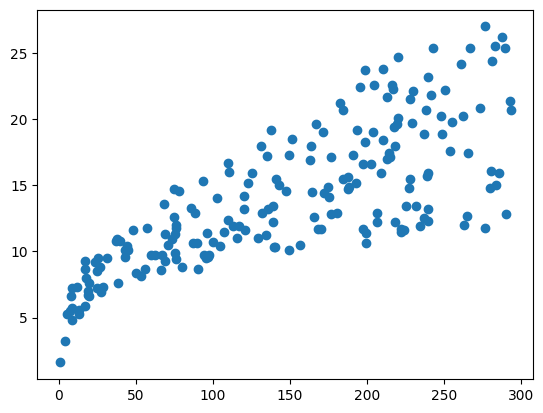

In [295]:
print(f"Builtin: {df['TV'].corr(df['Sales'])}")
print(f"Manual Calculation: {pearson_correlation(df['TV'], df['Sales'])}")
print(f"Swap: {df['Sales'].corr(df['TV'])}")
plt.scatter(df['TV'],df['Sales'])

0.5767476834229015


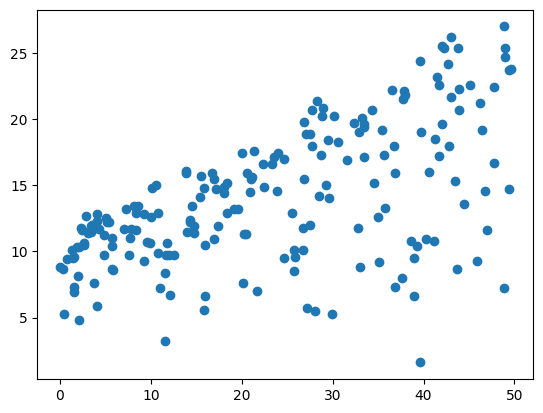

In [296]:
print(df['Radio'].corr(df['Sales']))
plt.scatter(df['Radio'],df['Sales'])

0.21955467558031128


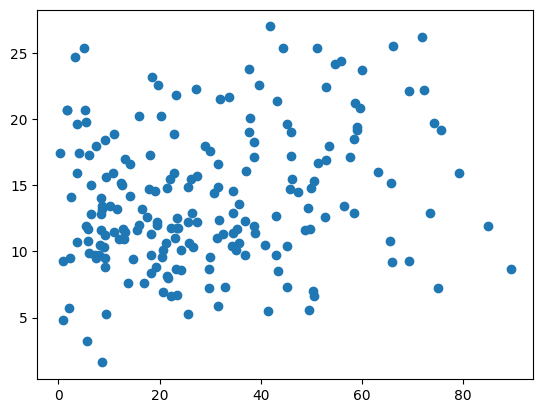

In [297]:
print(df['Newspaper'].corr(df['Sales']))
plt.scatter(df['Newspaper'],df['Sales'])

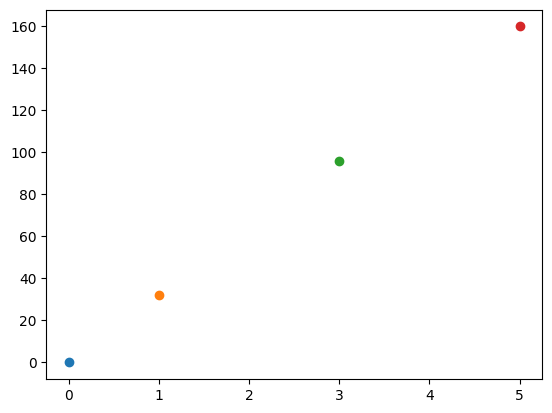

In [298]:
plt.scatter(0,0)
plt.scatter(1,32)
plt.scatter(3,96)
plt.scatter(5,160)


## Pearson Correlation Analysis

The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1:
- **+1** indicates a perfect positive linear relationship,
- **-1** indicates a perfect negative linear relationship,
- **0** indicates no linear relationship.

### Correlation Method

We used a custom function to compute the Pearson correlation coefficient and visualize the relationships between each advertising medium and **Sales**.

#### Code Snippet Used:

```python
def correlation(n, x, y):
    meanx = sum(x)/n
    meany = sum(y)/n
    zx = [(xi - meanx) for xi in x]
    zy = [(yi - meany) for yi in y]
    return sum([zx[i]*zy[i] for i in range(n)]) / ((sum([i**2 for i in zx])**0.5) * (sum([i**2 for i in zy])**0.5))
```

### Scatter Plots & Correlation Values

- **TV vs Sales**: Strong positive linear relationship
- **Radio vs Sales**: Moderate positive linear relationship
- **Newspaper vs Sales**: Weak or no clear linear relationship

The scatter plots visually support the correlation strength among features.

### Insights

- **TV** advertising is the most strongly correlated with **Sales**, suggesting it has a substantial impact.
- **Radio** shows a moderate correlation, implying a weaker but still meaningful influence.
- **Newspaper** appears to have very little linear correlation with **Sales**, which may suggest it contributes less predictively in a linear regression model.

Understanding correlation is crucial for feature selection and model design, especially for linear models.



## Model

### OLS Raw

In [299]:
import statistics as st

def OLS(x, y):
    xm = st.mean(x)
    ym = st.mean(y)
    
    up = sum((xi - xm) * (yi - ym) for xi, yi in zip(x, y))
    down = sum((xi - xm) ** 2 for xi in x)
    
    beta1 = up / down
    beta0 = ym - beta1 * xm
    
    return beta1, beta0

def OLS_Enhanced(df):
    
    xm = df['TV'].mean()
    ym = df['Sales'].mean()
    
    beta1 = sum((df['TV'] - xm) * (df['Sales'] - ym)) / sum((df['TV'] - xm) ** 2)
    beta0 = ym - beta1 * xm
    
    return beta1, beta0
    

In [300]:
weight, bias = OLS_Enhanced(df)
weight,bias

(0.04738102938038637, np.float64(7.03056145640022))

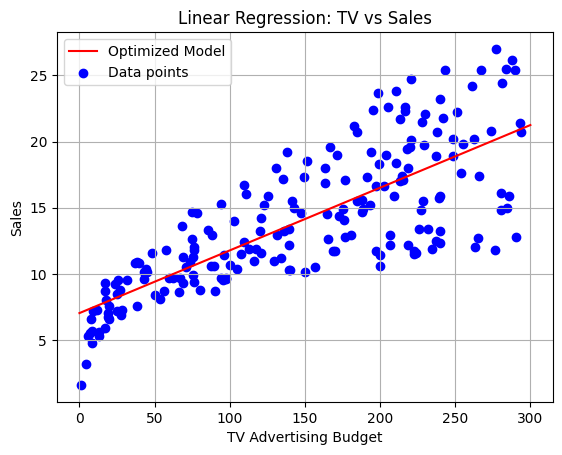

In [301]:
x = np.linspace(0, 300, 300)
y = weight * x + bias
plt.plot(x, y, color='red', label='Optimized Model')
plt.scatter(df['TV'], df['Sales'], color='blue', label='Data points')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs Sales')
plt.legend()
plt.grid(True)
plt.show()

### NumPy Polyfit

In [302]:
b1,b0 = np.polyfit(df['TV'], df['Sales'], deg=1)
b1

np.float64(0.04738102938038643)

In [303]:
b0

np.float64(7.030561456400218)

### SciKit Learn Regression Model

In [304]:
model = LinearRegression()
model.fit(df[['TV']], df['Sales'].values)

b0_sklearn = model.intercept_
b1_sklearn = model.coef_[0]

In [305]:
b0_sklearn

np.float64(7.030561456400218)

In [306]:
b1_sklearn

np.float64(0.047381029380386394)


## Linear Regression Modeling

We applied multiple methods to perform linear regression on the relationship between **TV advertising spend** and **Sales**.

---

### 1. Ordinary Least Squares (OLS) - Manual Implementation

We implemented two versions of OLS:
- `OLS`: Based on `statistics.mean`
- `OLS_Enhanced`: Using `pandas` directly for means

#### Results (OLS_Enhanced):
- **Slope (Weight)**: 0.0473
- **Intercept (Bias)**: 7.0306

A regression line was plotted using these parameters, clearly fitting the data points well.

---

### 2. NumPy Polyfit

We used NumPy's `polyfit` function with `deg=1` to perform linear regression.

```python
b1, b0 = np.polyfit(df['TV'], df['Sales'], deg=1)
```

#### Results:
- **Slope**: 0.0473
- **Intercept**: 7.0306

This result matches exactly with our manual implementation, validating our approach.

---

### 3. Scikit-learn LinearRegression

We also trained a model using `scikit-learn`'s `LinearRegression` class:

```python
model = LinearRegression()
model.fit(df[['TV']], df['Sales'].values)
```

#### Results:
- **Slope**: 0.0473
- **Intercept**: 7.0306

This confirms consistency across all implementations.

---

### Conclusion

All three modeling methods—manual OLS, NumPy polyfit, and Scikit-learn—produced the same regression line:

$\text{Sales} = 0.0473 \times \text{TV} + 7.0306$



This strong alignment confirms the robustness of the linear relationship between TV advertising and sales. This model can now be used for prediction and further performance evaluation.


## Predict

In [335]:
y_pred = model.predict(df[['TV']])

In [336]:
predict(170)

np.float64(15.08533645106591)


## Prediction Using Trained Model

After training the linear regression model on **TV advertising spend** and **Sales**, we used it to predict sales based on a given TV spend.

### Prediction Code

```python
y_pred = model.predict(df[['TV']])
predict(170)
```

### Result

For a TV advertising spend of **170**, the predicted **Sales** is approximately:

**15.09 (in thousands of units)**

This shows the model's practical applicability for forecasting sales based on TV budget allocation.


## Loss Functions 

In [377]:
y_real = df['Sales']
y_real = np.array(y_real)
#y_real

In [378]:
def residuals(y_true, y_pred):
    return np.subtract(y_true, y_pred)

In [379]:
def RSE(y_true, y_pred):
    res = residuals(y_true, y_pred)
    n = len(y_true)
    return np.sqrt(np.sum(res ** 2) / (n - 2)) 

In [380]:
RSE(y_real, y_pred)

np.float64(3.265797030988863)

In [381]:
def MSE(y_true, y_pred):
    res = residuals(y_true, y_pred)
    return np.mean(res ** 2)

In [385]:
residuals(y_real, y_pred)

array([ 4.21151321,  1.28363519,  1.47393115,  4.32643125, -2.65839189,
       -0.22432835,  2.06920854,  0.50578156, -2.61960199, -5.85640007,
       -1.53725832,  0.23937247,  1.06199147, -1.92133499,  2.3403665 ,
        6.15155972,  4.08689113,  1.01622456,  0.62493832,  0.66449719,
       -5.73351098, -2.0370145 , -2.30341233, -0.25765668, -7.43873248,
        1.23289811, -2.46112267,  0.12768411,  0.15005554,  0.54335987,
       -0.44919425, -2.00715591, -2.16634417, -2.03626053, -7.95266024,
        5.77221316,  4.15627482,  1.04980421,  3.71076675,  0.01598825,
        1.72120975, -0.18972464, -3.89197154,  0.3005488 , -0.38898944,
       -0.652679  ,  4.84833005, -2.95142238, -0.47506919, -5.05640007,
       -1.05839939,  5.35902437,  5.55653365,  0.77072023,  7.28613716,
       -1.85815933, -0.25043585,  6.82370046,  1.42842682, -1.44173711,
        4.83688926, -2.6233118 ,  2.13289435,  4.79060845, -0.97432272,
        0.99806184, -0.19695298,  0.66648902,  5.04011893,  1.87

In [386]:
RSE(y_real, y_pred)

MSE(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rse = np.sqrt(mse * (ldf/(ldf-2)))

## Standard Error

In [387]:
n = len(df['TV'])

x_mean = np.mean(df['TV'])
y_mean = np.mean(df['Sales'])

ty_pred = b0 + b1 * df['TV']
residuals = df['Sales'] - ty_pred

s_squared = np.sum(residuals ** 2) / (n - 2)
s = np.sqrt(s_squared)

se_beta_1 = s / np.sqrt(np.sum((df['TV'] - x_mean) ** 2))
se_beta_0 = s * np.sqrt(1/n + x_mean**2 / np.sum((df['TV'] - x_mean) ** 2))

print("SE_beta_0:", se_beta_0)
print("SE_beta_1:", se_beta_1)


SE_beta_0: 0.46196152910484983
SE_beta_1: 0.0027230254779367466


In [388]:
cib1_up = b1 + 2 * se_beta_1
cib1_down = b1 - 2 * se_beta_1
print([cib1_down, cib1_up])

[np.float64(0.041934978424512936), np.float64(0.05282708033625992)]


In [389]:
cib0_up = b0 + 2 * se_beta_0
cib0_down = b0 - 2 * se_beta_0
print([cib0_down, cib0_up])

[np.float64(6.106638398190518), np.float64(7.954484514609917)]


## Hypothesis Test

In [348]:
tb1 = abs(b1 / se_beta_1)
tb1

np.float64(17.40014177769917)

In [349]:
tb0 = abs(b0 / se_beta_0)
tb0

np.float64(15.218932775686858)

## $R^2$

In [359]:
RSS = np.sum((df["Sales"] - y_pred) ** 2)

print(RSS)
# Compute TSS (Total Sum of Squares)
TSS = np.sum((df["Sales"] - np.mean(df["Sales"])) ** 2)
print(TSS)
# Compute R-squared (R2)
R2 = 1 - (RSS / TSS)

# Print result
print(f"R-squared (R2): {R2:.4f}")

2090.166719902124
5318.887070707071
R-squared (R2): 0.6070



## Model Diagnostics and Evaluation

After fitting the linear regression model, we conducted several statistical tests and diagnostics to evaluate its reliability and effectiveness.

---

### 1. **Residual Standard Error (RSE)**
RSE gives a measure of the standard deviation of residuals:
- **RSE** ≈ 3.27  
This indicates that, on average, predictions deviate by about 3.27 units from actual sales.

---

### 2. **Mean Squared Error (MSE)**
- MSE quantifies the average squared difference between predicted and actual values.
- Helps penalize larger errors more severely.

---

### 3. **Standard Errors of Coefficients**
- **SE_β₀ (Intercept)** ≈ 0.462
- **SE_β₁ (TV Coefficient)** ≈ 0.0027  
Used to calculate confidence intervals and test coefficient significance.

#### 95% Confidence Intervals:
- **β₁ (Slope)**: [0.0419, 0.0528]
- **β₀ (Intercept)**: [6.1066, 7.9545]

---

### 4. **Hypothesis Testing**
We conducted t-tests to evaluate the statistical significance of the model coefficients.

- **t-statistic for β₁** ≈ 17.40  
- **t-statistic for β₀** ≈ 15.22  

Both values are significantly high, indicating strong evidence against the null hypothesis (i.e., the coefficients are statistically significant).

---

### 5. **R² (Coefficient of Determination)**

$$R^2 = 1 - \frac{RSS}{TSS}$$


- **RSS (Residual Sum of Squares)** ≈ 2090.17  
- **TSS (Total Sum of Squares)** ≈ 5318.89  
- **R² Score** ≈ 0.6070

This means that approximately **60.7%** of the variance in **Sales** can be explained by **TV advertising** spend.

---

### Conclusion

The model demonstrates a strong, statistically significant linear relationship between TV advertising and sales. The R² value, high t-statistics, and narrow confidence intervals all support the model's validity for predictive use.



## Gradient Decent

In [373]:
X_raw = df["TV"].values
y = df["Sales"].values

X = (X_raw - np.mean(X_raw)) / np.std(X_raw)

In [374]:
B0, B1 = 0, 0
lr = 0.00001
epochs = 300000
n = len(X)

cost_history = []

for _ in range(epochs):
    y_pred = B0 + B1 * X
    error = y - y_pred 

    dB0 = -2 * np.sum(error) / n
    dB1 = -2 * np.sum(error * X) / n

    B0 -= lr * dB0
    B1 -= lr * dB1

    cost = np.mean(error ** 2)
    cost_history.append(cost)

In [375]:
B1_original = B1 / np.std(X_raw)
B0_original = B0 - (B1_original * np.mean(X_raw))

print(f"Optimized B0 (Intercept) using Gradient Descent (Original Scale): {B0_original:.4f}")
print(f"Optimized B1 (Slope) using Gradient Descent (Original Scale): {B1_original:.4f}")

Optimized B0 (Intercept) using Gradient Descent (Original Scale): 7.0131
Optimized B1 (Slope) using Gradient Descent (Original Scale): 0.0473



## Gradient Descent Optimization

We implemented **Gradient Descent** from scratch to estimate the linear regression coefficients for predicting **Sales** based on **TV** advertising spend.

---

### Process Summary

#### Step 1: Feature Normalization

```python
X = (X_raw - np.mean(X_raw)) / np.std(X_raw)
```

Standardizing the input feature (**TV**) helps gradient descent converge more efficiently.

---

#### Step 2: Gradient Descent Loop

- **Learning Rate (lr)**: 0.00001  
- **Epochs**: 300,000  
- **Initial Weights**: B0 = 0, B1 = 0

The cost function minimized was:

$\text{Cost} = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2$

Gradient descent updates were performed using the partial derivatives of the cost function with respect to B0 and B1.

---

#### Step 3: Rescaling Back to Original Scale

After training on the normalized feature, the coefficients were converted back:

$B1_{\text{original}} = \frac{B1}{\text{std}(X)}, \quad B0_{\text{original}} = B0 - B1_{\text{original}} \times \text{mean}(X)$

---

### Final Optimized Coefficients (Original Scale)

- **Intercept (B0)** ≈ 7.0131  
- **Slope (B1)** ≈ 0.0473

These values match closely with those obtained via OLS, `polyfit`, and `scikit-learn`, validating the correctness of our gradient descent implementation.

---

### Conclusion

Gradient descent is a powerful optimization technique that, when properly tuned, can yield results consistent with analytical solutions. This method is especially beneficial for large-scale or complex models where closed-form solutions may not be feasible.
